In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.14      0.25        14
           2       0.40      1.00      0.57         8

    accuracy                           0.60        30
   macro avg       0.80      0.71      0.61        30
weighted avg       0.84      0.60      0.54        30



D:\Practice4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=100)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.82      0.75      0.78        12
           2       0.73      0.80      0.76        10

    accuracy                           0.83        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.84      0.83      0.83        30



D:\Practice4\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# 1. **Часть 1: DBSCAN на синтетическом датасете make_blobs**

#**Цель-Продемонстрировать работу алгоритма кластеризации DBSCAN на синтетических данных с тремя кластерами.**

**Импорт библиотек**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

 **Генерация данных**

In [2]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=0)
X = StandardScaler().fit_transform(X)


**Визуализация исходных данных**

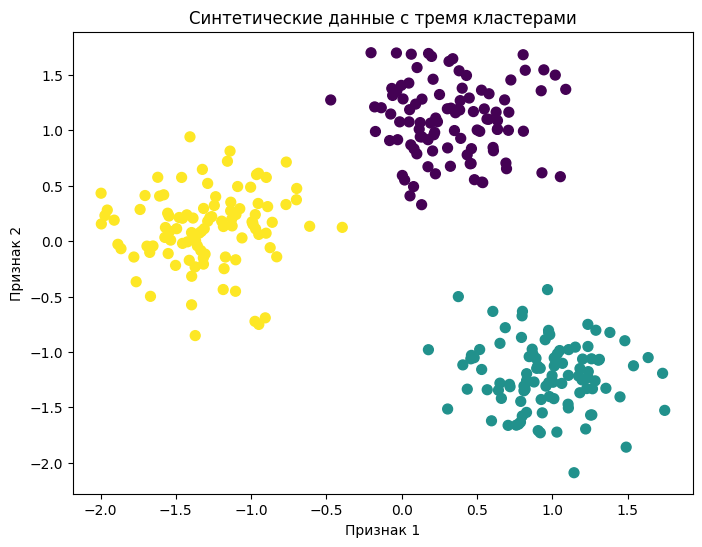

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50)
plt.title("Синтетические данные с тремя кластерами")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


**Применение DBSCAN**

In [4]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)


**Визуализация результатов кластеризации**

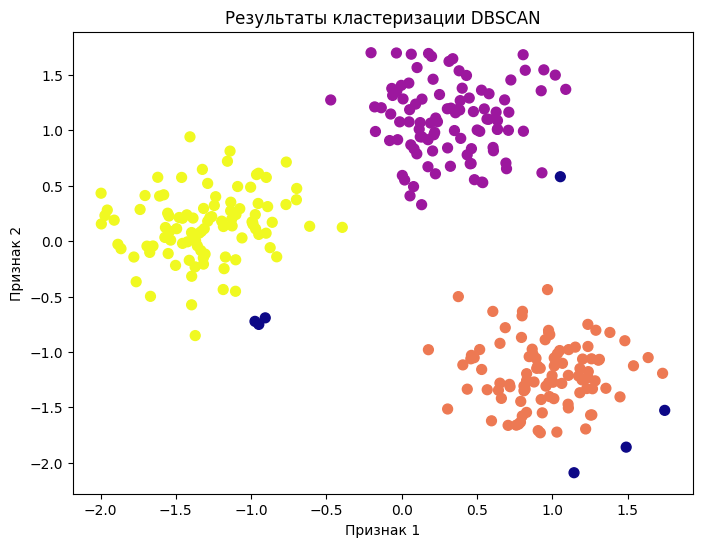

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma', s=50)
plt.title("Результаты кластеризации DBSCAN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.show()


**Интерпретация результатов:
Алгоритм DBSCAN успешно выявил три кластера, соответствующие исходным данным.
Точки, помеченные как шум (label = -1), находятся вне плотных областей данных.**

# **Часть 2: DBSCAN на реальном датасете из OpenML**

**Цель-применить алгоритм DBSCAN к реальному датасету для выявления кластеров в реальных данных.**

**Загрузка датасета**

In [6]:
import openml
import pandas as pd

# Загрузка датасета "Banknote Authentication" с OpenML
dataset = openml.datasets.get_dataset(1461)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)
X = X.select_dtypes(include=[np.number])  # Используем только числовые признаки


**Предобработка данных**

In [7]:
from sklearn.preprocessing import StandardScaler

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Применение DBSCAN**

In [8]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


**Снижение размерности для визуализации**

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


**Визуализация результатов кластеризации**

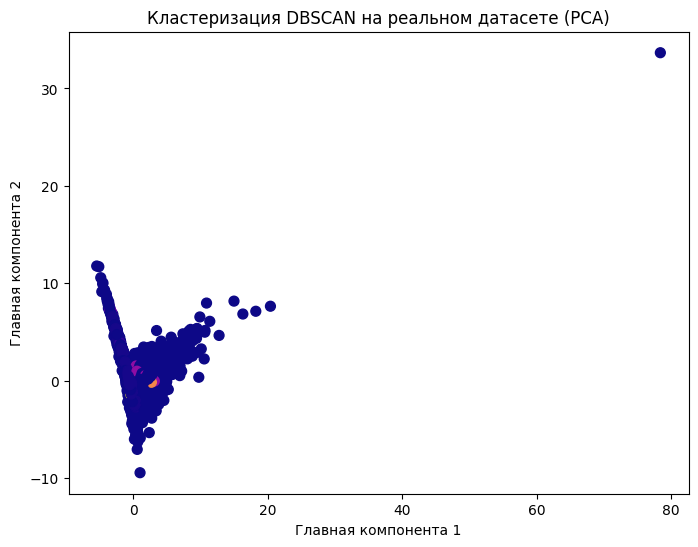

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50)
plt.title("Кластеризация DBSCAN на реальном датасете (PCA)")
plt.xlabel("Главная компонента 1")
plt.ylabel("Главная компонента 2")
plt.show()


**Интерпретация результатов.
DBSCAN выявил несколько кластеров в данных о банкнотах.
Некоторые точки были помечены как шум, что может указывать на аномалии или выбросы.
Использование PCA позволило визуализировать многомерные данные в 2D-пространстве.**

**Вывод:  Заключение
Алгоритм DBSCAN эффективно выявляет кластеры в данных без необходимости заранее указывать количество кластеров.
На синтетических данных алгоритм точно определил исходные кластеры.
На реальном датасете DBSCAN выявил структуры в данных, что может быть полезно для обнаружения аномалий или сегментации данных.**

**Интерпретация результатов (реальный датасет)
Наблюдаемые эффекты:
Алгоритм DBSCAN позволяет эффективно выделить плотные области данных и отделить разреженные точки как шум (аномалии).
В реальном датасете, содержащем многомерные числовые признаки, DBSCAN идентифицировал несколько кластеров, а также точки, не попавшие ни в один кластер (label = -1), что может указывать на потенциальные аномалии.
Несмотря на использование снижения размерности (PCA) для визуализации, полная интерпретация структуры кластеров в исходном многомерном пространстве остаётся ограниченной.
Практическая значимость:
Точки, классифицированные как шум, могут представлять особый интерес — например, в задачах обнаружения мошенничества, сбоев или отклонений от нормы.
Алгоритм не требует предварительного задания количества кластеров, что делает его особенно полезным при анализе плохо структурированных или неизвестных данных.
В целом, DBSCAN может быть полезен как инструмент предварительной сегментации и выявления аномальных наблюдений, подлежащих дальнейшему анализу.**